
# __Springboard Relax Take Home Challenge__

##### _Ben Takacs_
###### __Python version 3.10.4__


### __Imports__


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



### __Load Data__


In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', sep=',',)
useng = pd.read_csv('takehome_user_engagement.csv', sep=',')

In [3]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
useng

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
# Set indices
users.set_index('object_id', inplace=True)
users.index.name = 'user_id'
useng['time_stamp'] = pd.to_datetime(useng['time_stamp'])
useng.set_index('user_id', inplace=True)

In [6]:
users.dtypes

creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [7]:
# Correct dtypes
users.creation_time = pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit='s')
users.invited_by_user_id = users.invited_by_user_id.astype('Int64')

In [8]:
# Check for null values
users.isnull().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [9]:
users[users.invited_by_user_id == users.invited_by_user_id.mode()[0]].value_counts().sum()

8

In [10]:
users[users.creation_time == users.last_session_creation_time]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,2014-03-30 16:19:38,0,0,254,11204
21,2013-01-22 12:27:42,Hunter Alfie,AlfieHunter@gmail.com,PERSONAL_PROJECTS,2013-01-22 12:27:42,0,0,54,<NA>
22,2014-02-10 06:00:46,Myers Jordan,JordanMyers@gmail.com,ORG_INVITE,2014-02-10 06:00:46,0,0,7,2994
...,...,...,...,...,...,...,...,...,...
11984,2014-02-11 21:26:11,Reed Cerys,CerysReed@yahoo.com,SIGNUP,2014-02-11 21:26:11,0,0,170,<NA>
11987,2013-03-15 03:21:01,Reed Poppy,ftdkorrj@uyhoy.com,SIGNUP,2013-03-15 03:21:01,0,0,1,<NA>
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263


In [11]:
users[users.last_session_creation_time.isnull() & users.invited_by_user_id.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,<NA>
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,<NA>
15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,<NA>
16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,<NA>
32,2013-04-17 16:21:30,Perez Timothy,TimothyJPerez@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,98,<NA>
...,...,...,...,...,...,...,...,...,...
11973,2012-10-30 03:09:47,Simmons Thomas,ThomasSimmons@gmail.com,PERSONAL_PROJECTS,NaT,0,0,52,<NA>
11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,<NA>
11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,<NA>


In [12]:
users[users.last_session_creation_time.isnull() | users.invited_by_user_id.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,<NA>
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,<NA>
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,<NA>
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,<NA>
12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270
...,...,...,...,...,...,...,...,...,...
11994,2012-06-05 04:46:16,Grimstone Joel,conxzghp@eaouk.com,GUEST_INVITE,NaT,0,0,84,5450
11995,2013-10-21 13:33:17,Werfel Sebastian,SebastianWerfel@gmail.com,PERSONAL_PROJECTS,2013-10-22 13:33:17,0,0,0,<NA>
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,<NA>


Most invited by user id has 8 counts, not enough to be a good sample size for filling missing values.  
There are 3000 users (1/4) who created an account and never logged in again (one login). This could be a big enough sample size to fill in missing values, but since it is directly related to the feature we want to predict, it's iffy.  
There are 1500 rows of overlap with a missing last session id and invited by user id.  
7000 total rows with a missing value.

For now, I'll drop the invited by user id column and the rows with missing values.

In [13]:
users.drop(columns=['invited_by_user_id'], index=users[users.last_session_creation_time.isnull()].index, inplace=True)
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
user_id,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193
...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83


Lost about a quarter of the data.


### Identify 'adopted users'


In [99]:
dfu = useng.reset_index()

In [100]:
# For faster for looping, reduce data to users with at least 3 logins
login_counts = useng.groupby('user_id').size().reset_index(name='login_count')
active_users = login_counts[login_counts['login_count'] >= 3]
active_users

,user_id,login_count
1,2,14
7,10,284
13,20,7
24,33,18
28,42,342
...,...,...
8802,11975,216
8805,11980,8
8806,11981,4
8812,11988,30


In [101]:
# Merge with user data
df3 = dfu.iloc[active_users.index]
df3.time_stamp = df3.time_stamp.dt.date # convert to date for definition

/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_5126/3745452793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.time_stamp = df3.time_stamp.dt.date # convert to date for definition


In [102]:
dfdrop = df3.drop_duplicates(subset=['user_id', 'time_stamp']) # drop any logins from the same dat

In [103]:
dfdrop

,user_id,time_stamp,visited
1,2,2013-11-15,1
7,2,2014-02-03,1
13,2,2014-03-13,1
24,10,2013-02-06,1
28,10,2013-02-26,1
...,...,...,...
8802,529,2013-10-24,1
8805,529,2013-11-12,1
8806,529,2013-11-15,1
8812,529,2013-12-10,1


In [104]:
from datetime import timedelta

# Function goes through each user and checks if there are 2 login dates (with 1 in the middle) within 7 days
def adopted_user(dates):
    dates = sorted(dates)
    for i in range(len(dates) - 2): # only taking first and last login date
        if dates[i+2] - dates[i] <= timedelta(days=6): # 7 days inclusive
            return True
    return False
    
# apply function to login dates of each user
result = dfdrop.groupby('user_id')['time_stamp'].apply(adopted_user)

In [105]:
result[result == True].count()

43

Only 43 adopted users, of 12000.

In [107]:
# Create adopted user column for modeling
users['adopted_user'] = 0

In [110]:
users.loc[users.index.isin(result[result == True].index), 'adopted_user'] = 1

In [112]:
# Check we did the right thing
users.adopted_user.value_counts()

adopted_user
0    8780
1      43
Name: count, dtype: int64

In [98]:
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,0


### __Modeling__

In [127]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix

In [128]:
# Split x and y
x = users.drop(columns=['adopted_user', 'creation_time', 'last_session_creation_time', 'name', 'email'])
y = users['adopted_user']

# Split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, random_state=69, stratify=y)

# Select categorical and numerical columns
cat_feat = x.select_dtypes(include=['object']).columns
num_feat = x.select_dtypes(include=['int64']).columns

# check
print(cat_feat)

# Create preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feat),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feat)
])

# Create classifier object
rf = RandomForestClassifier(random_state=69)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Create param grid
param_grid = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False]
}

# Use random search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, verbose=1, random_state=69)
model = random_search.fit(xtrain, ytrain)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
ypred = random_search.best_estimator_.predict(xtest)
ypred_prob = random_search.best_estimator_.predict_proba(xtest)
print("Test Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Index(['creation_source'], dtype='object')
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best CV Accuracy: 0.9951641079392483
Test Accuracy: 0.9950135992747053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       0.00      0.00      0.00        11

    accuracy                           1.00      2206
   macro avg       0.50      0.50      0.50      2206
weighted avg       0.99      1.00      0.99      2206



/Users/bencetakacs/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bencetakacs/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bencetakacs/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<Figure size 640x480 with 0 Axes>

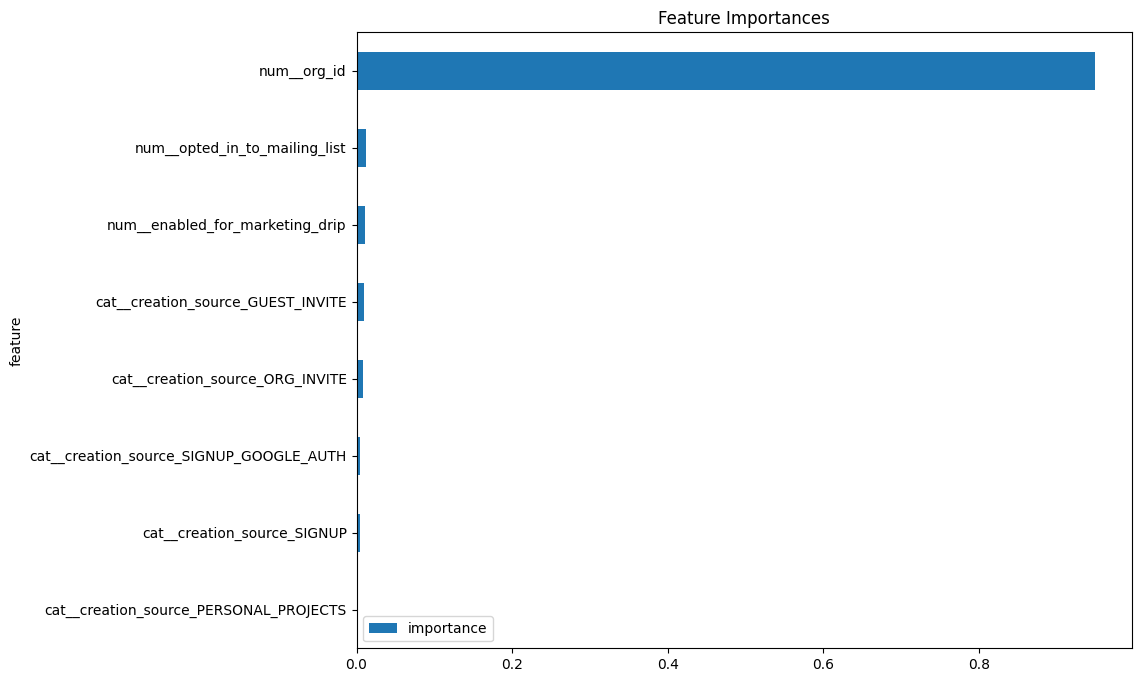

In [129]:
# Get feature names from pre processor
feat_imp = model.best_estimator_.named_steps['classifier'].feature_importances_

fimpdf = pd.DataFrame({'feature':model.best_estimator_.named_steps['preprocessor'].get_feature_names_out(input_features=xtrain.columns), 'importance':feat_imp}).sort_values(by='importance', ascending=True)

plt.figure()
fimpdf.plot(kind='barh', x='feature', y='importance', title='Feature Importances', figsize=(10, 8))
plt.show()

In [123]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot